# Aircraft Safety Analysis

# Business Problem
This project the Aviation Accident dataset, which contains data no aircraft incidents and accidents from 1948 to present. Within this dataset, we uncover patterns in the reported accidents that have results in harm to passengers or damage to the aircraft. Our analysis aims to assist a new aviation company in identifying aircrafts that are classified as low-risk according to our safety score. 

# I.  Exploratory Data Analysis

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

### Opening our data set  

In [2]:
df = pd.read_csv('data/Aviation_data.csv', parse_dates=['Event.Date'], low_memory=False)

### Initial inspection of data

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

### Observations  
1. Many columns with NaN values  
2. Some columns that are useful  
 * Event.Date
 * Make
 * Model
 * Number.of.Engines
 * Engine.Type
 * Total Injuries
 * Weather.Condition
 * Aircraft.damage
 * Purpose.of.flight

# II.  Data Cleaning

### Dropping Columns

In [7]:
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
                   'Investigation.Type', 'Registration.Number', 'Publication.Date',
                   'FAR.Description', 'Schedule', 'Air.carrier', 'Amateur.Built', 'Report.Status']

df.drop(columns = columns_to_drop, inplace=True)
df.shape

(90348, 19)

### Tidying Column Names

In [8]:
df.columns = df.columns.str.replace('.', '_')
df.rename(columns = {'Aircraft_damage':'Aircraft_Damage', 'Broad_phase_of_flight':'Phase_of_Flight'}, inplace = True)

### Dropping Duplicates

In [9]:
df.drop_duplicates(inplace=True)

### Dropping NaN in Accident_Number and Event_Date

In [10]:
df.dropna(subset = ['Accident_Number', 'Event_Date'], inplace = True)

### Weather

In [11]:
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x : 'UNK' if ((x == 'NAN') | (x == 'Unk')) else x)
df['Weather_Condition'].value_counts()

VMC    77302
IMC     5976
UNK     1118
Name: Weather_Condition, dtype: int64

### Injuries

In [12]:
# Replacing NaN with the mode of Fatal Injuries
fatal_mode = df['Total_Fatal_Injuries'].mode()
df['Total_Fatal_Injuries'].fillna(fatal_mode[0], inplace = True)

# Replacing NaN with the mode of Serious Injuries
Serious_mode = df['Total_Serious_Injuries'].mode()
df['Total_Serious_Injuries'].fillna(Serious_mode[0], inplace = True)

# Replacing NaN with the mode of Minor Injuries
Minor_mode = df['Total_Minor_Injuries'].mode()
df['Total_Minor_Injuries'].fillna(Minor_mode[0], inplace = True)

# Replacing NaN with the mode of Uninjured
Uninjured_mode = df['Total_Uninjured'].mode()
df['Total_Uninjured'].fillna(Uninjured_mode[0], inplace = True)

# Changing the Injury_Severity values to be clearer
df.loc[df['Injury_Severity'].str[:5] == 'Fatal', 'Injury_Severity'] = 'Fatal'
df['Injury_Severity'].fillna('Unavailable', inplace = True)

### Aircraft Damage

In [13]:
#Change Nulls to Unknown
df['Aircraft_Damage'].fillna("Unknown", inplace = True)
df = df[df['Aircraft_Damage'] != 'Unknown']

### Aircraft Type

In [14]:
df['Aircraft_Category'].value_counts()

Airplane             26234
Helicopter            3354
Glider                 503
Gyrocraft              173
Weight-Shift           160
Balloon                135
Powered Parachute       88
Ultralight              29
Unknown                 14
WSFT                     9
Blimp                    4
Powered-Lift             4
Rocket                   1
ULTR                     1
Name: Aircraft_Category, dtype: int64

In [15]:
# df = df[(df['Aircraft_Category'] == 'Airplane')]

### Make

In [16]:
#Capitalize Make 
df['Make'] = df['Make'].apply(lambda x: str(x).capitalize())

# #Keeping Makes with counts over 100
df = df[df.groupby('Make')['Make'].transform('count') > 100]

# #Combining some common names in the Make
df.loc[df['Make'].str[:6] == 'Airbus', 'Make'] = 'Airbus'
df.loc[df['Make'].str[:11] == 'Air tractor', 'Make'] = 'Air tractor'
df.loc[df['Make'] == 'Mcdonnell douglas', 'Make'] = 'Douglas'

df.shape

(69018, 19)

### Models

In [17]:
#Dropping Null values
df.dropna(subset = ['Model'], inplace = True)

### Years

In [18]:
#Only keeping data that is after 1980
df['created_year'] = df['Event_Date'].dt.year
df = df[df['created_year'] >= 1980]

### Engines

In [19]:
#Keeping Engine Types that appear over 20 times
df = df[df.groupby('Engine_Type')['Engine_Type'].transform('count') > 20]

In [20]:
#Null values to Unknown
df['Number_of_Engines'].fillna('Unknown', inplace = True)

### Phase of Flight

In [21]:
#Null values to Unknown
df['Phase_of_Flight'].fillna('Unknown', inplace = True)

#Dropping Unknown
# df = df[df['Phase_of_Flight'] != 'Unknown']

### Countries

In [22]:
#Null to Unknown
df['Country'].fillna('Unknown', inplace = True)

### Location

In [23]:
#Changing the name of location to be consistent
df['Location'] = df['Location'].apply(lambda x: str(x).upper())

### Purpose of Flight

In [24]:
#Nulls to Unknown
df['Purpose_of_flight'].fillna('Unknown', inplace = True)

###  Creating new Columns

In [25]:
#Total Injuries
df['Total_Injuries'] = df['Total_Minor_Injuries'] + df['Total_Serious_Injuries']

#Total Passengers
df['Total_Passengers'] = df['Total_Injuries'] + df['Total_Uninjured'] + df['Total_Fatal_Injuries']

#Make and Model of plane
df['Make_Model'] = (df['Make'] + ' ' + df['Model'])

df.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,created_year,Total_Injuries,Total_Passengers,Make_Model
6,20001218X45446,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,NaN,Cessna,180,...,4.0,0.0,0.0,0.0,IMC,Unknown,1981,0.0,4.0,Cessna 180
7,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,0.0,0.0,2.0,VMC,Takeoff,1982,0.0,2.0,Cessna 140
8,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,0.0,0.0,2.0,IMC,Landing,1982,0.0,2.0,Cessna 401B
9,20020909X01560,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North american,NAVION L-17B,...,0.0,0.0,3.0,0.0,IMC,Cruise,1982,3.0,3.0,North american NAVION L-17B
10,20020909X01559,FTW82DA034,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,NaN,Piper,PA-28-161,...,0.0,0.0,0.0,1.0,VMC,Approach,1982,0.0,1.0,Piper PA-28-161


### Export as CSV

In [26]:
#Export to separate CSV for easy access
df.to_csv('./data/Clean_Aviation.csv', index = False)

## Accident trends over the years

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


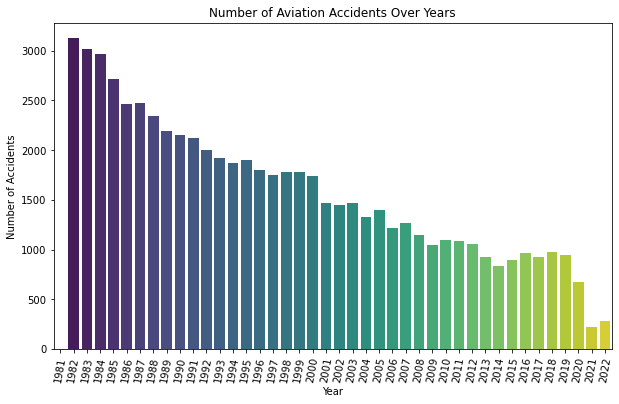

<Figure size 432x288 with 0 Axes>

In [27]:
#Make a new dataframe that contains accidents per year
Accidents_per_year = df['created_year'].value_counts().sort_index().copy()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(Accidents_per_year.index, Accidents_per_year.values, palette='viridis')
ax.set_xticklabels(Accidents_per_year.index, rotation =80)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Aviation Accidents Over Years')
plt.show()

plt.tight_layout()
plt.savefig('./Figures/Aviation_Accidents_Over_Years',dpi = 120)

### Observations  
1. There is a steady downward trend. 
2. There is a noticable drop during 2020 (most likely to due to Covid-19)

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


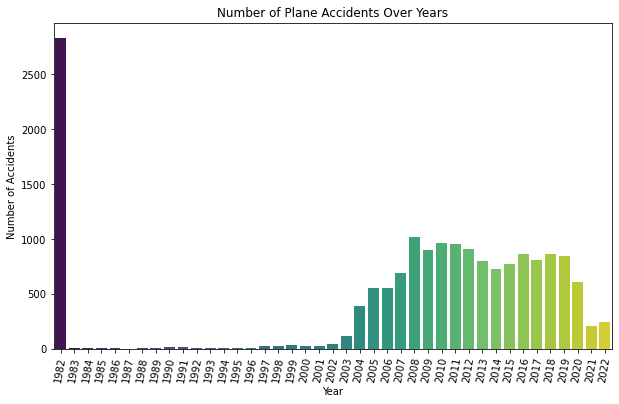

<Figure size 432x288 with 0 Axes>

In [28]:
#Updating df only show airplanes
df = df[df['Aircraft_Category'] == 'Airplane']
Plane_accidents_per_year = df['created_year'].value_counts().sort_index()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(Plane_accidents_per_year.index, Plane_accidents_per_year.values, palette='viridis')
ax.set_xticklabels(Plane_accidents_per_year.index, rotation = 80)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Plane Accidents Over Years')
plt.show()

plt.tight_layout()
plt.savefig('./Figures/Plane_Accidents_Over_Years',dpi = 120)

### Observations  
The year 1982 is an anomaly as there is a drastic change of accidents after this year. This might be due accidents not being reported properly. Then at the start of 2000, the amount of accidents per year starts to increase. Again, we see a noticable drop in 2020 which can be assumed to be the effect of Covid-19.

## Aircraft damages and injuries

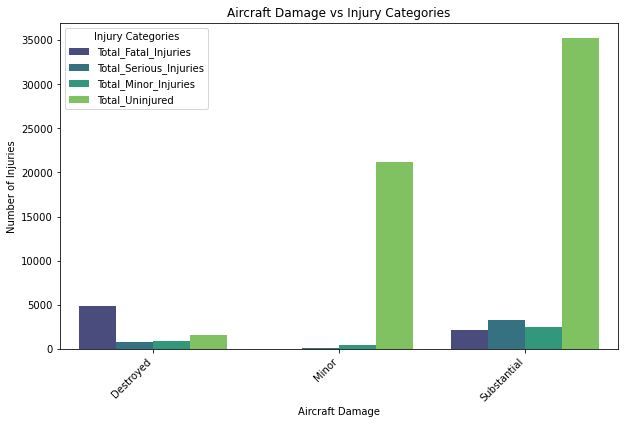

<Figure size 432x288 with 0 Axes>

In [29]:
#Creating a list of columns we need
subset_columns = ['Aircraft_Damage', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']

#Creating a df that contains the columns we want
df_subset = df[subset_columns]

#Performing a groupby function to count how many injuries
grouped_data = df_subset.groupby('Aircraft_Damage').sum().reset_index()
melted_data = pd.melt(grouped_data, id_vars='Aircraft_Damage', var_name='Injury Category', value_name='Number of Injuries')

#Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Aircraft_Damage', y='Number of Injuries', hue = 'Injury Category', palette='viridis')

plt.title('Aircraft Damage vs Injury Categories')
plt.xlabel('Aircraft Damage')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Injuries')

plt.legend(title='Injury Categories')
plt.show()
plt.tight_layout()

#Saving the graph as png
plt.savefig('./Figures/Aircraft_Damage_vs_Injury_Type',dpi = 120)

## Common Engine Types

In [30]:
#Finding the percentage of Engine Types
(df['Engine_Type'].value_counts(normalize=True) * 100).to_frame()

,Engine_Type
Reciprocating,90.992267
Turbo Prop,5.625406
Turbo Fan,2.349330
Unknown,0.607992
Turbo Jet,0.383685
Turbo Shaft,0.041320


## Engine Type - Aircraft Damage

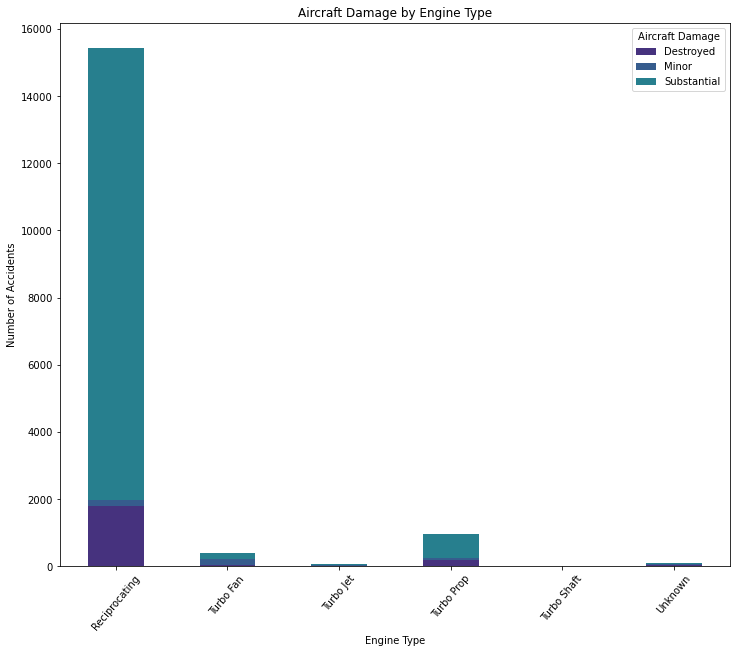

<Figure size 432x288 with 0 Axes>

In [31]:
# Create a contingency table
contingency_table = pd.crosstab(df['Engine_Type'], df['Aircraft_Damage'])

# Plot the data as a grouped bar plot
sns.set_palette('viridis')
contingency_table.plot(kind='bar', stacked=True,figsize=(12,10), rot=50)

plt.title('Aircraft Damage by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Aircraft Damage')
plt.show()
plt.tight_layout()

#Saving the graph as png
plt.savefig('./Figures/Aircraft_Damage_by_Engine_Type',dpi = 120)

## Engine Type - Injury

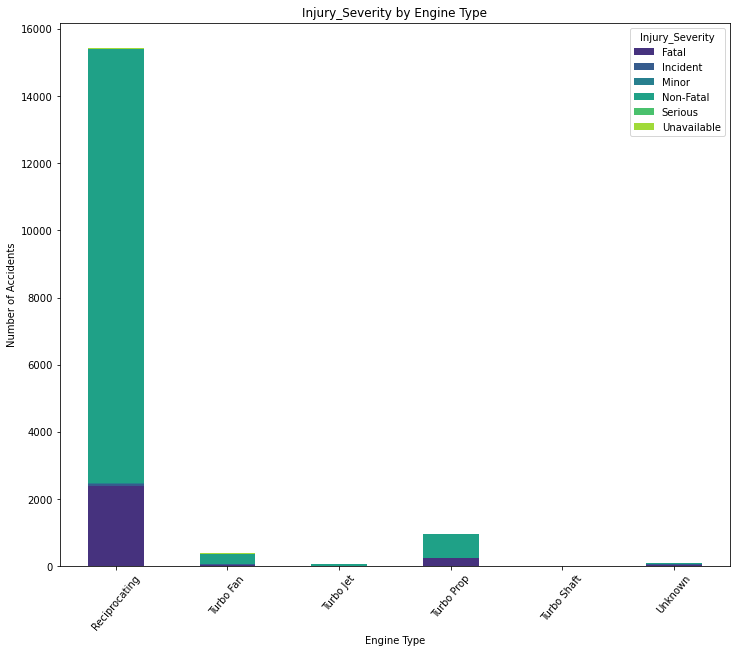

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(df['Engine_Type'], df['Injury_Severity'])

# Plot the data as a grouped bar plot
sns.set_palette('viridis')
contingency_table.plot(kind='bar', stacked=True,figsize=(12,10), rot=50)

plt.title('Injury_Severity by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury_Severity')
plt.show()
plt.tight_layout()

#Saving the graph as png
plt.savefig('./Figures/Injury_Severity_by_Engine_Type', dpi = 120)

## Phase of Flight - Aircraft Damage

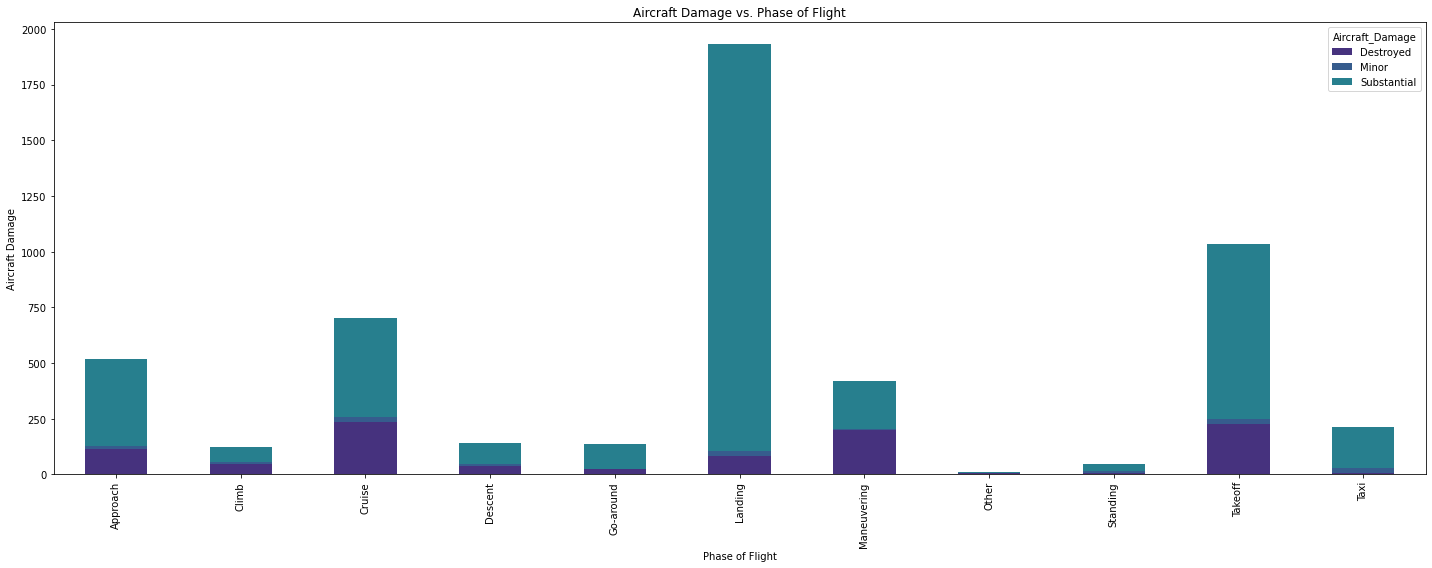

In [33]:
#Removing occurrences when Phase of Flight is Unknown
df = df[df['Phase_of_Flight'] !='Unknown']

#Groupby phase and damage
Phase_of_Flight_Damage = df.groupby(['Phase_of_Flight', 'Aircraft_Damage']).size().unstack(fill_value = 0)

#plotting
fig, ax = plt.subplots(figsize=(20, 8))
sns.set_palette('viridis')
Phase_of_Flight_Damage.plot(kind = 'bar', stacked = True, ax = ax);

plt.xlabel("Phase of Flight")
plt.ylabel("Aircraft Damage")
plt.title("Aircraft Damage vs. Phase of Flight")
plt.tight_layout()

#Saving the graph as png
plt.savefig('./Figures/Aircraft_Damage_vs_Phase_of_Flight', dpi = 120)

## Phase of Flight - Injury

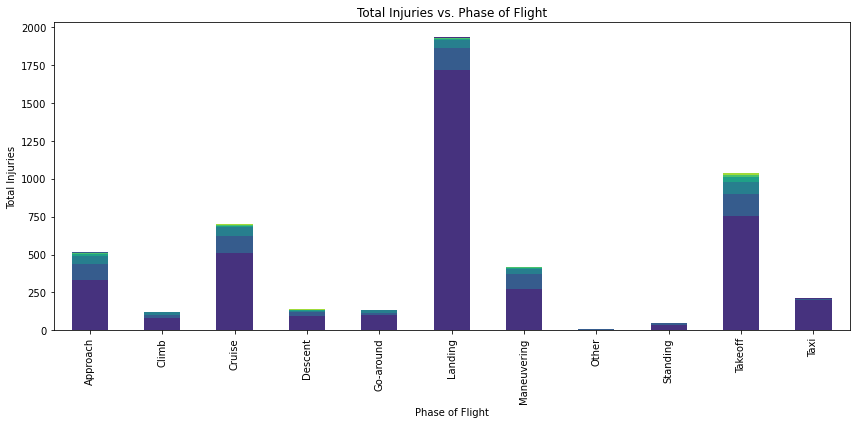

In [34]:
#Groupby phase of flight and injuries
Phase_of_Flight_Injury = df.groupby(['Phase_of_Flight', 'Total_Injuries']).size().unstack(fill_value = 0)

#plotting
fig, ax = plt.subplots(figsize= (12, 6))

#There are too many different number of Injuries so we removed the label
Phase_of_Flight_Injury.plot(kind = 'bar', stacked = True, ax = ax, legend=False);

plt.xlabel("Phase of Flight")
plt.ylabel("Total Injuries")
plt.title("Total Injuries vs. Phase of Flight");
plt.tight_layout()

#Saving the graph as png
plt.savefig('./Figures/Total_Injuries_vs_Phase_of_Flight', dpi = 120)

## Weather - Aircraft Damage

In [35]:
#Creating df that only has weather and aircraft damage
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

#Getting the counts and remove the chance of multiindex problem
Weather_v_Damage_count = Weather_v_Damage.value_counts().unstack(level = 1)

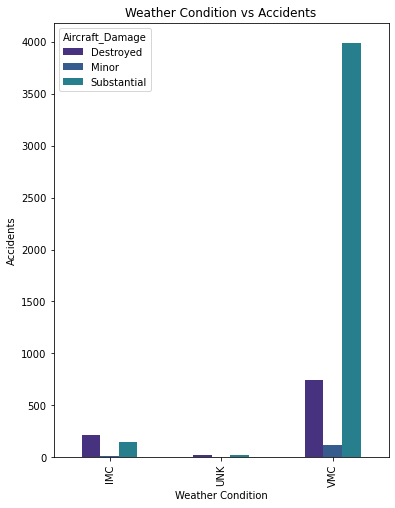

In [36]:
#Plotting
Weather_v_Damage_count.plot(kind='bar', figsize=(6,8),use_index = True)

plt.xlabel("Weather Condition")
plt.ylabel("Accidents")
plt.title("Weather Condition vs Accidents");

## Weather - Injury

In [37]:
#Creating a column with number of times each weather appeared
new_col = df['Weather_Condition'].value_counts().values

#Groupby weather and show injuries/uninjured
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()

#Creating new columns with count of weather
Weather_v_Injuries['Number_of_Accidents'] = new_col

#copy
Weather_Injuries = Weather_v_Injuries.copy()

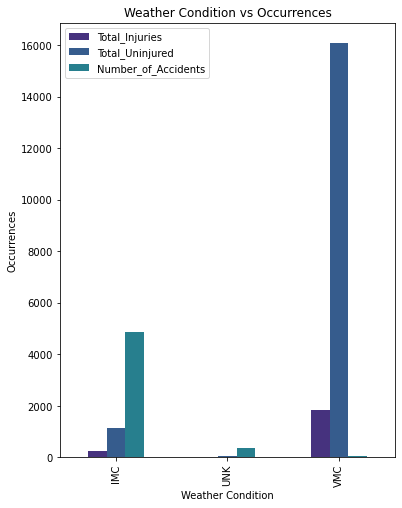

In [38]:
#plotting
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)
plt.xlabel("Weather Condition")
plt.ylabel("Occurrences")
plt.title("Weather Condition vs Occurrences");

## Aircraft Make - Injury

In [39]:
#Getting counts of make 
#option to grab a certain amount by adding [:x] to the line below
makes = df['Make'].value_counts()

#Grouping and sum
Make_Rates = df[df['Make'].isin(makes.index)][['Make', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Make_Rates = Make_Rates.groupby(['Make'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

#Creating rates for injuries
Make_Rates['Injury_Rate'] = Make_Rates['Total_Injuries']/Make_Rates['Total_Passengers']
Make_Rates['Fatality_Rate'] = Make_Rates['Total_Fatal_Injuries']/Make_Rates['Total_Passengers']
Make_Rates['Survival_Rate'] = 1- Make_Rates['Injury_Rate'] - Make_Rates['Fatality_Rate']

#Creating df with make and damage
Make_damage_list = df[df['Make'].isin(makes.index)][['Make', 'Aircraft_Damage']]

#Grouping by make and damage
Make_damage_df = Make_damage_list.groupby(['Make','Aircraft_Damage']).size().to_frame(None)

#get the count
Make_damage_sum = Make_damage_df.groupby(level='Make').sum()

#normalize it
Make_normalized_damage_df = Make_damage_df.div(Make_damage_sum, level='Make').unstack(level=1, fill_value = 0)

#merge the normalized damage with the injury rates
Make_df = Make_Rates.merge(Make_normalized_damage_df, left_index=True, right_index=True);

#cleaning the column names
Make_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

#dropping the first three column
Make_df.drop(Make_df.columns[0:3],axis =1,inplace= True)

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


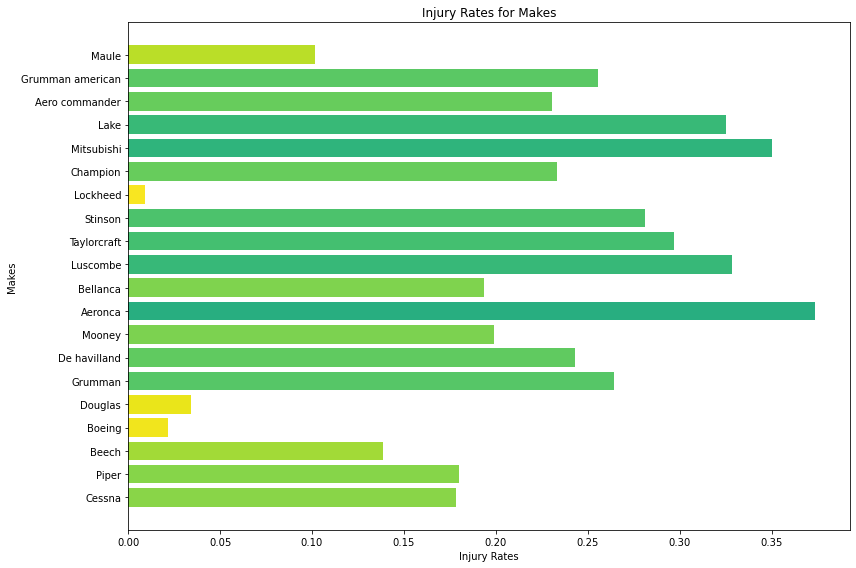

In [40]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]

#variable for the rates
injury_rate = Make_df['Injury_Rate']

#creating a list with normalized scores
normalized_scores = (injury_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Make_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Injury_Rate'], color=color)
    
ax.set_title('Injury Rates for Makes')
ax.set_ylabel('Makes')
ax.set_xlabel('Injury Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Injury_Rates_for_Makes',dpi = 120)

## Aircraft Make - Damage

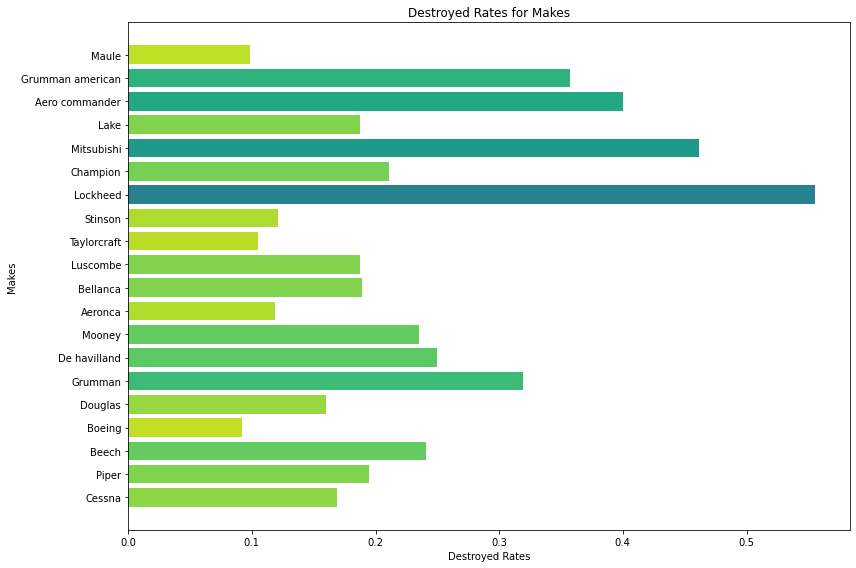

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]

Destroyed_rate = Make_df['Destroyed_Rate']

#creating a list with normalized scores
normalized_scores = (Destroyed_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Make_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Destroyed_Rate'], color=color)
    
ax.set_title('Destroyed Rates for Makes')
ax.set_ylabel('Makes')
ax.set_xlabel('Destroyed Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Destroyed_Rates_for_Makes',dpi = 120)

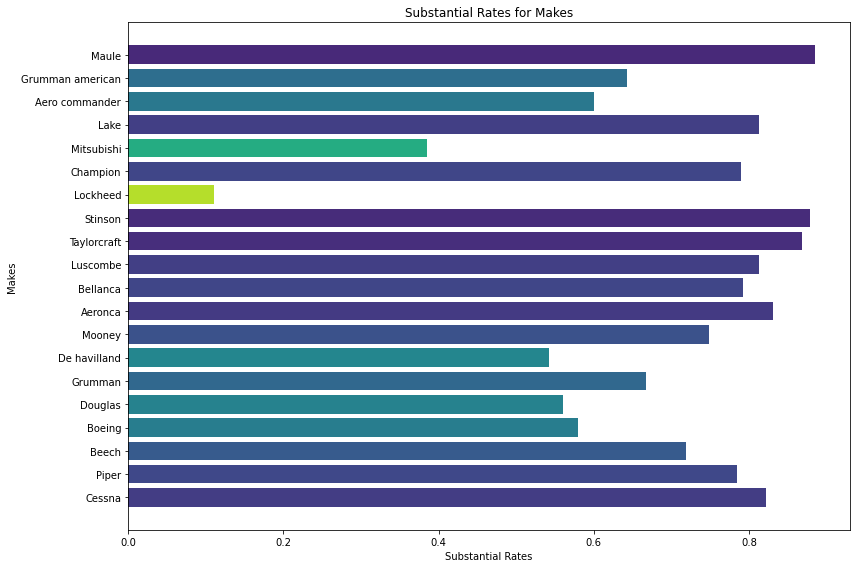

In [42]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]

Substantial_rate = Make_df['Substantial_Rate']

#creating a list with normalized scores
normalized_scores = (Substantial_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Make_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Substantial_Rate'], color=color)
    
ax.set_title('Substantial Rates for Makes')
ax.set_ylabel('Makes')
ax.set_xlabel('Substantial Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Substantial_Rates_for_Makes',dpi = 120)

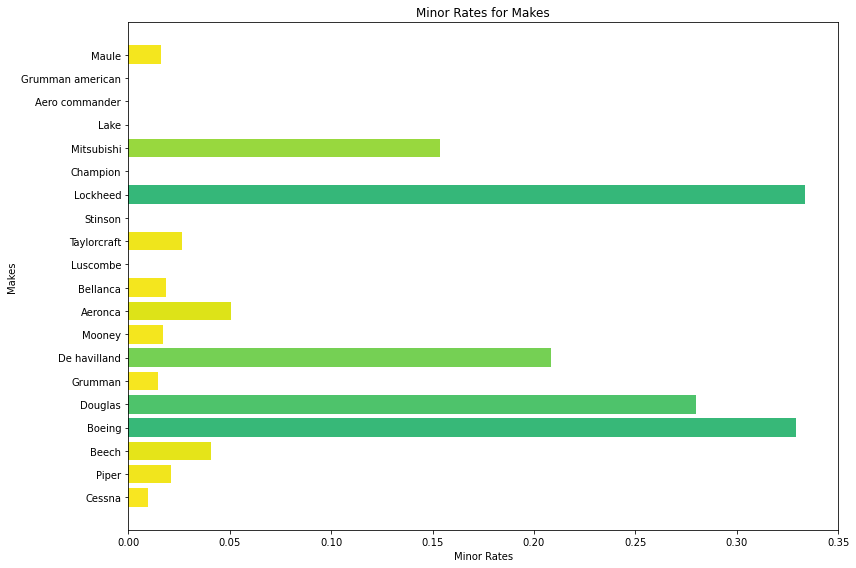

In [43]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]

Minor_rate = Make_df['Minor_Rate']

#creating a list with normalized scores
normalized_scores = (Minor_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Make_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Minor_Rate'], color=color)
    
ax.set_title('Minor Rates for Makes')
ax.set_ylabel('Makes')
ax.set_xlabel('Minor Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Minor_Rates_for_Makes',dpi = 120)

## Aircraft - Injury

In [44]:
#Getting models that occur over 30 times
Model_over_30 = df['Make_Model'].value_counts()[lambda x : x > 30]

#Grouping and sum
Model_Rates = df[df['Make_Model'].isin(Model_over_30.index)][['Make_Model', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Model_Rates = Model_Rates.groupby(['Make_Model'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

#Creating rates for injuries
Model_Rates['Injury_Rate'] = Model_Rates['Total_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Fatality_Rate'] = Model_Rates['Total_Fatal_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Survival_Rate'] = 1- Model_Rates['Injury_Rate'] - Model_Rates['Fatality_Rate']

#Creating df with make and damage
Model_damage_list = df[df['Make_Model'].isin(Model_over_30.index)][['Make_Model', 'Aircraft_Damage']]

#Grouping by make and damage
Model_damage_df = Model_damage_list.groupby(['Make_Model','Aircraft_Damage']).size().to_frame(None)

#get the count
Model_damage_sum = Model_damage_df.groupby(level='Make_Model').sum()

#normalize it
Model_normalized_damage_df = Model_damage_df.div(Model_damage_sum, level='Make_Model').unstack(level=1, fill_value = 0)

#merge the normalized damage with the injury rates
Model_df = Model_Rates.merge(Model_normalized_damage_df, left_index=True, right_index=True);

#cleaning the column names
Model_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

#dropping the first three column
Model_df.drop(Model_df.columns[0:3],axis =1,inplace= True)

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


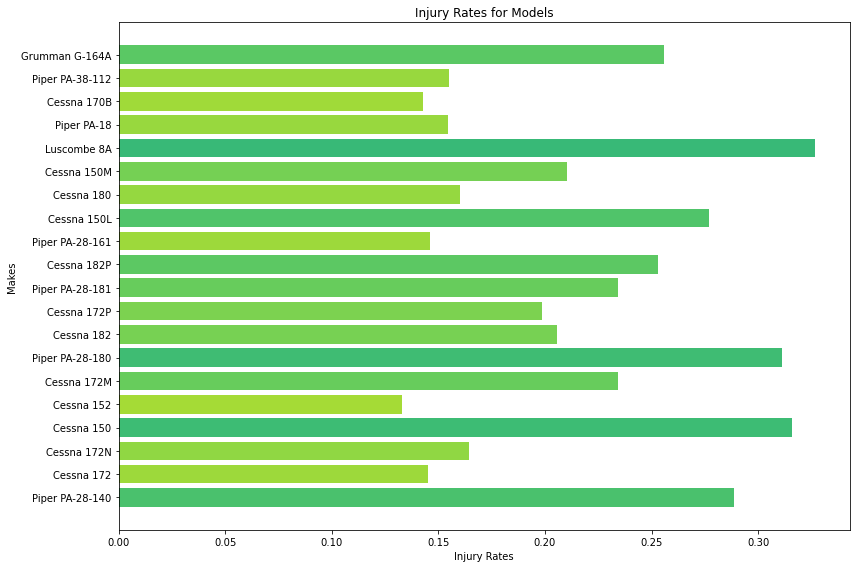

In [45]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]

injury_rate = Model_df['Injury_Rate']

#creating a list with normalized scores
normalized_scores = (injury_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Injury_Rate'], color=color)
    
ax.set_title('Injury Rates for Models')
ax.set_ylabel('Makes')
ax.set_xlabel('Injury Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Injury_Rates_for_Models',dpi = 120)

## Aircraft Model- Damage

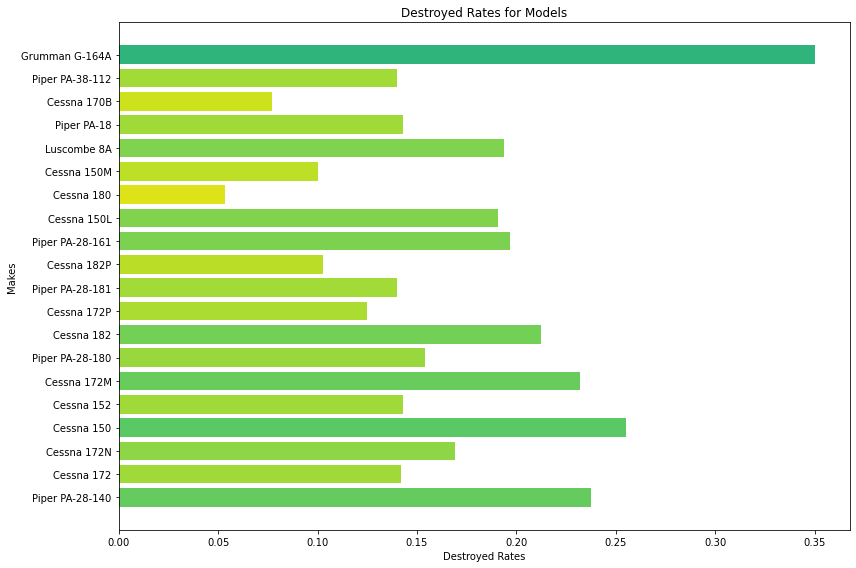

In [46]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]

Destroyed_rate = Model_df['Destroyed_Rate']

#creating a list with normalized scores
normalized_scores = (Destroyed_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Destroyed_Rate'], color=color)
    
ax.set_title('Destroyed Rates for Models')
ax.set_ylabel('Makes')
ax.set_xlabel('Destroyed Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Destroyed_Rates_for_Models',dpi = 120)

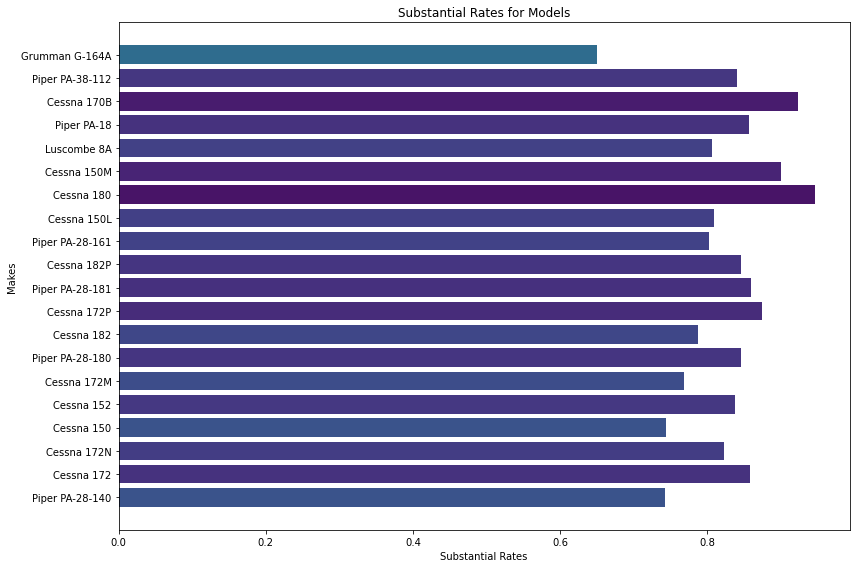

In [47]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]
Substantial_rate = Model_df['Substantial_Rate']

#creating a list with normalized scores
normalized_scores = (Substantial_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Substantial_Rate'], color=color)
    
ax.set_title('Substantial Rates for Models')
ax.set_ylabel('Makes')
ax.set_xlabel('Substantial Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Substantial_Rates_for_Models',dpi = 120)

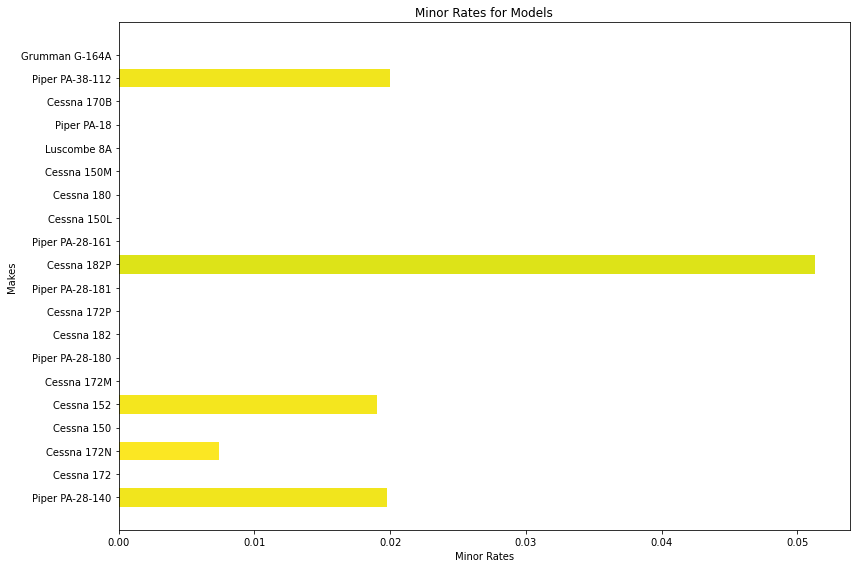

In [48]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(0, 1, len(Make_df) +1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(Make_df))]
Minor_rate = Model_df['Minor_Rate']

#creating a list with normalized scores
normalized_scores = (Minor_rate - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Minor_Rate'], color=color)
    
ax.set_title('Minor Rates for Models')
ax.set_ylabel('Makes')
ax.set_xlabel('Minor Rates')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Minor_Rates_for_Models',dpi = 120)

## Safety Score

In [49]:
#Creating a new column using our safety score equation
Make_df['Safety_Score'] = (
    10 * Make_df['Fatality_Rate'] + 30 * Make_df['Injury_Rate'] +  60 * Make_df['Survival_Rate'] +
    10 * Make_df['Destroyed_Rate'] + 30 * Make_df['Substantial_Rate']+ 60 * Make_df['Minor_Rate'])

#sorting
Make_df.sort_values(by=['Safety_Score'], ascending=True,inplace=True)

#export to csv
Make_df.to_csv('./Export_csvs/Make_Safety_Score.csv', index=True)

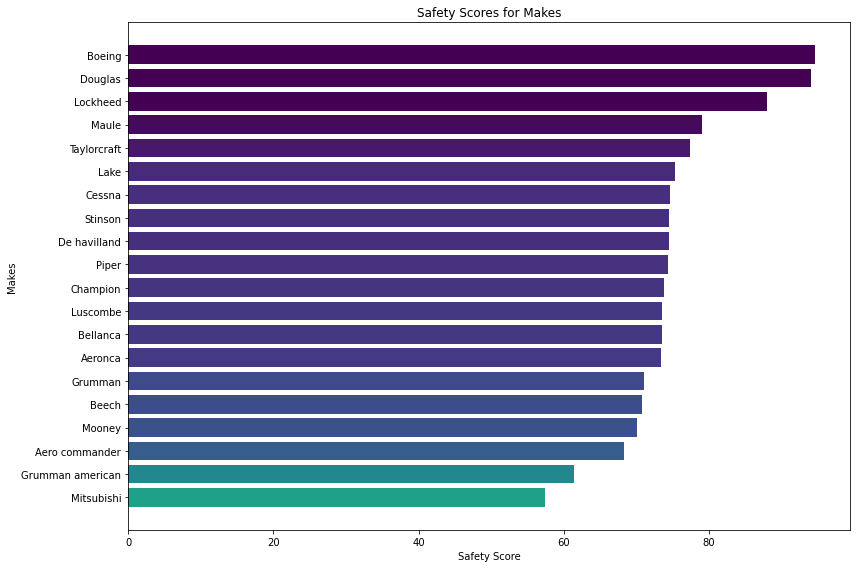

In [50]:
#plotting
fig, ax = plt.subplots(figsize=(12,8))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(40, 80, 10)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(9)]

safety_scores = Make_df['Safety_Score']

#creating a list with normalized scores
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Make_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Safety Scores for Makes')
ax.set_ylabel('Makes')
ax.set_xlabel('Safety Score')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Makes_Safety_Scores',dpi = 120)

In [51]:
#Creating a new column using our safety score equation
Model_df['Safety_Score'] = (
    10 * Model_df['Fatality_Rate'] + 30 * Model_df['Injury_Rate'] +  60 * Model_df['Survival_Rate'] +
    10 * Model_df['Destroyed_Rate'] + 30 * Model_df['Substantial_Rate']+ 60 * Model_df['Minor_Rate'])

#sorting
Model_df.sort_values(by=['Safety_Score'], ascending=True, inplace=True)

#export to csv
Model_df.to_csv('./Export_csvs/Model_Safety_Score.csv', index=True)

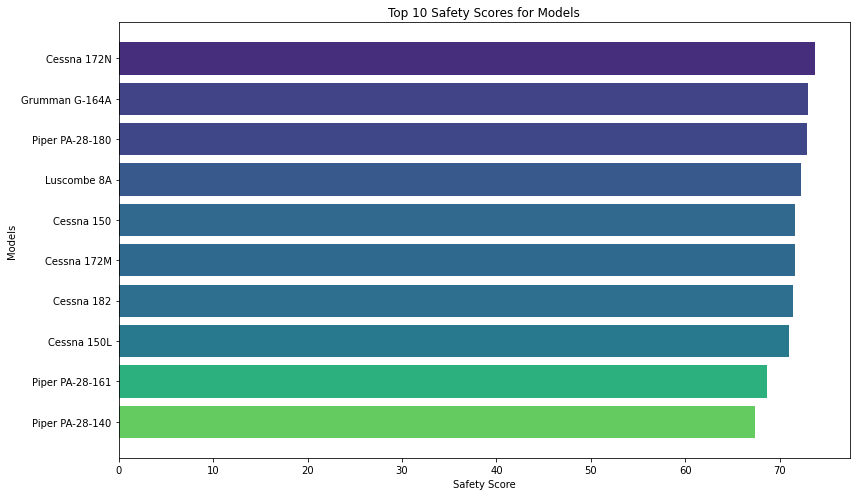

In [52]:
#plotting
fig, ax = plt.subplots(figsize=(12,7))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(65, 75, 10)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(9)]

safety_scores = Model_df['Safety_Score']

#creating a list with normalized scores
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    if (idx == 10): #stop at the tenth value
        break
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Top 10 Safety Scores for Models')
ax.set_ylabel('Models')
ax.set_xlabel('Safety Score')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Top_10_Models_Safety_Scores',dpi = 120)

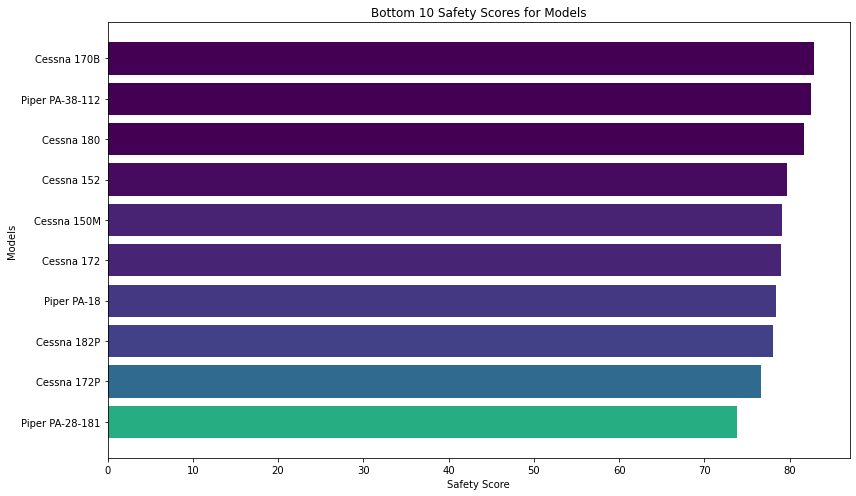

In [53]:
#plotting
fig, ax = plt.subplots(figsize=(12,7))

#color map
color_map = plt.cm.viridis_r

#creating bins and assigning colors to bins
bin_edges = np.linspace(70, 80, 10)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(9)]
safety_scores = Model_df['Safety_Score']

#creating a list with normalized scores
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    if (idx >= 10): #select the last 10
        normalized_score = normalized_scores[idx]
        color = color_map(normalized_score)
        ax.barh(make, row['Safety_Score'], color=color)
    else:
        continue
    
ax.set_title('Bottom 10 Safety Scores for Models')
ax.set_ylabel('Models')
ax.set_xlabel('Safety Score')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Bottom_10_Models_Safety_Scores',dpi = 120)

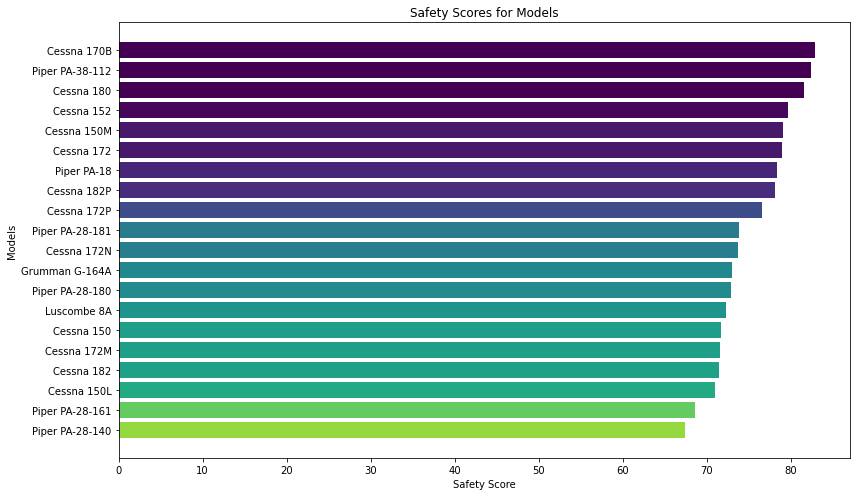

In [54]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(65, 80, 100)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(99)]
safety_scores = Model_df['Safety_Score']
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

#for looping thru the rows 
#idx is the index
#make is the index.name
#row is the row info
#using idx to find the right color and assigning it to the bar
for idx, (make, row) in enumerate(Model_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Safety Scores for Models')
ax.set_ylabel('Models')
ax.set_xlabel('Safety Score')
plt.tight_layout()

#Saving as png
plt.savefig('./Figures/Models_Safety_Scores',dpi = 120)

## Final Recommendation